<h1 align='center'>Machine Learning Lab</h1>
<h3 align='center'>Lab 03</h3>
<h3 align='center'>Exercise 1</h3>

#### Importing Packages

In [1]:
import matplotlib.pyplot as plt    #Importing Matplotlib
import numpy as np                 #Importing Numpy

#### Defining Rosenbrock Function

In [2]:
#Defining Constant values of Rosenbrock Function
a = 1
b = 100

In [3]:
rosenbrock_func = lambda x , y : (a - x)**2 + b * (y - x**2)**2

#### Plotting a 3D Plot of Rosenbrock Function

In [4]:
#Creating x and y vectors for plotting Rosenbrock function within a specific range
x = np.linspace(-10,10)
y = np.linspace(-10,10)
X, Y = np.meshgrid(x, y)

#Applying Rosenbrock function to all values of vector x and y to get values for f(x,y)
fxy = np.array(rosenbrock_func(X,Y))

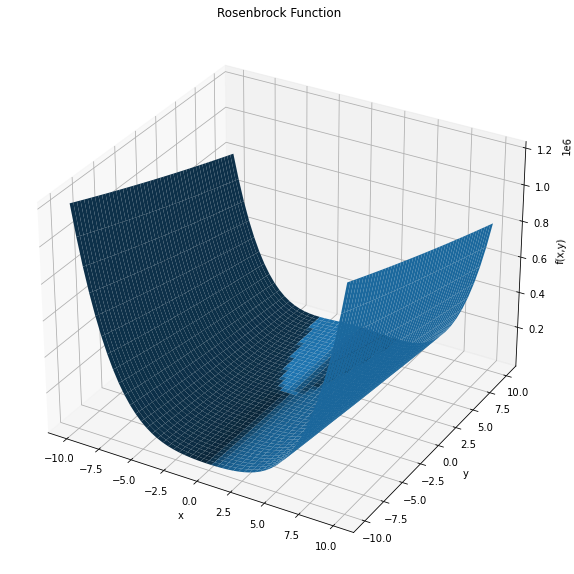

In [5]:
#Plotting Rosenbrock Function as a 3D Surface
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, fxy)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Rosenbrock Function')
plt.show()

#### Derive the partial gradients.

The Partial Derivative of Rosenbrock Function with Respect to X:

$\frac{\partial f}{\partial x} = 2(a-x)(-1) + 2b(y-x^2)(-2x)\\$
$\frac{\partial f}{\partial x} = -2(a-x) -4bx(y-x^2)$

The Partial Derivative of Rosenbrock Function with Respect to Y:

$\frac{\partial f}{\partial y} = 2b(y-x^2)(1)\\$
$\frac{\partial f}{\partial y} = 2b(y-x^2)$

#### Convert the function and gradient of this function into equivalent code representation.

##### Partial Derivative of Rosenbrock Function with respect to X

In [6]:
dx = lambda x , y : -2 * (a - x) -4*x*b * (y - x**2)

##### Partial Derivative of Rosenbrock Function with respect to Y

In [7]:
dy = lambda x , y : 2*b * (y - x**2)

#### Optimize the function with Gradient Descent. Set the appropriate hyperparameters like initial valus of (x,y) and the steplength α through trial and error.

In [8]:
#Defining Hyperparameters for Gradient Descent
alpha = 0.00001
epsilon = 10**-4
total_iteration = 3000

In [9]:
#Initializing x and y vector for storing all intermediate values of x and y so that to use for plotting
x_arr = []
y_arr = []

##### Function to perform Gradient Descent on X and Y

In [10]:
def gradient_descent(x,y,total_iter):
    global x_arr, y_arr
    for i in range(total_iter):
        #Updating the value of x and y based on gradient direction
        x_ = x - alpha * dx(x,y)
        y_ = y - alpha * dy(x,y)
        
        #Checking the stopping Condition
        if rosenbrock_func(x,y) - rosenbrock_func(x_,y_) < epsilon:
            x_arr.append(x_)
            y_arr.append(y_)
            return (x_,y_)
        
        #Swapping the new values of x and y with previous values
        x , y = x_ , y_
        
        #Appending the new x and y values in x and y arrays for plotting
        x_arr.append(x_)
        y_arr.append(y_)
        
    #Raising Exception if after total Iterations, our Gradient Descent didn't Converge
    raise Exception('Not Converged in {} many Iterations'.format(total_iter))

In [11]:
x_ , y_ = gradient_descent(-7,-5,total_iteration)
print('The Minima Point after {} many Iteration is:\n({},{})'.format(total_iteration,x_,y_))

The Minima Point after 3000 many Iteration is:
(0.031151356204668527,-0.012073605080919696)


#### Visualize the trajectory on the same 3D plot. This trajectory should ideally lead to the function minimum, starting off with (x = 10, y = 10) for example.

In [12]:
#Preparing x and y array for plotting
X_arr, Y_arr = np.meshgrid(np.array(x_arr), np.array(y_arr))
fxy_ = np.array(rosenbrock_func(X_arr,Y_arr))

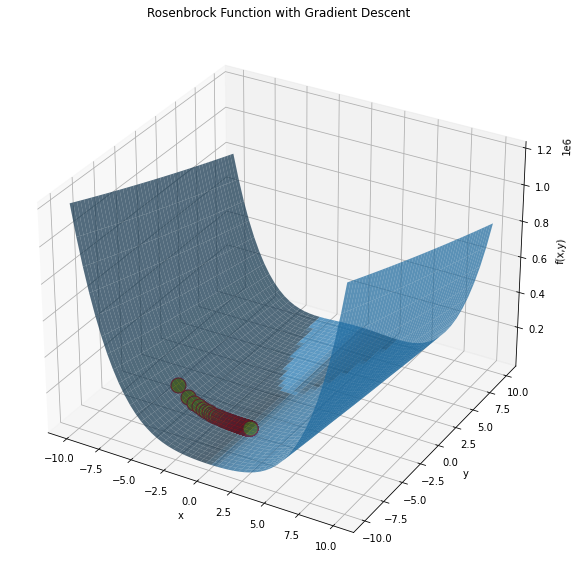

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#Plotting the Original Rosenbrock Function
ax.plot_surface(X, Y, fxy,alpha=0.7)

#Plotting each intermediate x and y value to show Gradient Descent Convergence to Minima 
for i in range(len(X_arr[0])):
    ax.plot(X_arr[0][i], Y_arr[0][i], fxy_[0][i] , markerfacecolor='y', markeredgecolor='r', marker='o', markersize=15)
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Rosenbrock Function with Gradient Descent')
plt.show()